In [3]:
import os
import glob
import pandas as pd
import numpy as np
import miditoolkit

### Dataset Detail
* Total: 1276 songs
* Composers: 60
* Train/Valid/Test: 962:137:177 (0.75 : 0.11 : 0.14)
* Train_composers: 58
* Valid_composers: 16
* Test_composers: 16
* Subset: 1/10 original (126 songs)

In [5]:
## Read dataset metadata
data = pd.read_csv('../../../maestro-v3.0.0/maestro-v3.0.0.csv')
data

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508
...,...,...,...,...,...,...,...
1271,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",test,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,241.470442
1272,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",train,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,114.696243
1273,Wolfgang Amadeus Mozart,"Sonata in F Major, K533",validation,2004,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,1139.198478
1274,Wolfgang Amadeus Mozart,"Sonata in F Major, K533/K494",validation,2018,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,1068.751602


In [10]:
composers = data['canonical_composer']
composers = np.unique(composers)
len(composers)

60

In [13]:
## train/test group amount
split = data['split']
unique, counts = np.unique(split, return_counts=True)
print(unique)
print(counts)

['test' 'train' 'validation']
[177 962 137]


In [40]:
train_comp = data.loc[data['split'] == 'train']['canonical_composer']
val_comp = data.loc[data['split'] == 'validation']['canonical_composer']
test_comp = data.loc[data['split'] == 'test']['canonical_composer']
print('Train_comp: {}, Val_comp: {}, Test_comp: {}'.format(len(np.unique(train_comp)), len(np.unique(val_comp)), len(np.unique(test_comp))))

Train_comp: 58, Val_comp: 16, Test_comp: 16


In [58]:
train = data.loc[data['split'] == 'train']['midi_filename']
test = data.loc[data['split'] == 'test']['midi_filename']
valid = data.loc[data['split'] == 'validation']['midi_filename']

rand_train = data.query('(split == "train")').sample(len(train)//10)
rand_test = data.query('(split == "test")').sample(len(test)//10)
rand_val = data.query('(split == "validation")').sample(len(valid)//10)


In [68]:
## sub train/test/val to new dataframe --> csv
frames = [rand_train, rand_val, rand_test]
subset = pd.concat(frames)
subset.to_csv('./subset-metadata.csv', header=True)

### Read all midi files for pedal location

In [29]:
root = '../../../maestro-v3.0.0/Original'
dir_path = './shifted-midi'
data = pd.read_csv('./subset-metadata.csv')
for idx, row in data.iterrows():
    #path = '2011/MIDI-Unprocessed_04_R2_2011_MID--AUDIO_R2-D2_02_Track02_wav.midi'
    print('{}/{}'.format(idx+1, len(data)))
    filename = row['midi_filename']
    folder = row['split']
    midi_obj = miditoolkit.midi.parser.MidiFile(os.path.join(root, filename))
    pedals = []
    nume = midi_obj.time_signature_changes[0].numerator
    tick = midi_obj.ticks_per_beat
    for msg in midi_obj.instruments[0].control_changes:  ## 0, 7800, 7816, 7830....
        if msg.number == 64:
            #pedals.append(msg)
            msg.time += int(tick*1.5)
    if not os.path.exists(os.path.join(dir_path, folder)):
        os.makedirs(os.path.join(dir_path, folder))
    midi_obj.dump(os.path.join(dir_path, folder, filename))      

1/126
./shifted-midi/train/2018/MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--2.midi
2/126
./shifted-midi/train/2011/MIDI-Unprocessed_22_R1_2011_MID--AUDIO_R1-D8_11_Track11_wav.midi
3/126
./shifted-midi/train/2008/MIDI-Unprocessed_10_R3_2008_01-05_ORIG_MID--AUDIO_10_R3_2008_wav--4.midi
4/126
./shifted-midi/train/2009/MIDI-Unprocessed_10_R1_2009_03-05_ORIG_MID--AUDIO_10_R1_2009_10_R1_2009_03_WAV.midi
5/126
./shifted-midi/train/2014/MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO_21_R1_2014_wav--1.midi
6/126
./shifted-midi/train/2011/MIDI-Unprocessed_08_R1_2011_MID--AUDIO_R1-D3_09_Track09_wav.midi
7/126
./shifted-midi/train/2008/MIDI-Unprocessed_10_R3_2008_01-05_ORIG_MID--AUDIO_10_R3_2008_wav--3.midi
8/126
./shifted-midi/train/2014/MIDI-UNPROCESSED_11-13_R1_2014_MID--AUDIO_11_R1_2014_wav--3.midi
9/126
./shifted-midi/train/2004/MIDI-Unprocessed_XP_15_R1_2004_04_ORIG_MID--AUDIO_15_R1_2004_04_Track04_wav.midi
10/126
./shifted-midi/train/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID

In [3]:
7800 + 576

8376

In [17]:
for index, row in data.iterrows():
    print(row['canonical_composer'])
    break

Franz Liszt


In [49]:
print('Metrical Evaluation of Test Set')
print('-'*30)
print(' Accuracy:  0.623')
print('Precision:  0.704')
print('   Recall:  0.521')
print('       F1:  0.601')
print('    Macro:  0.611')

Metrical Evaluation of Test Set
------------------------------
 Accuracy:  0.623
Precision:  0.704
   Recall:  0.521
       F1:  0.601
    Macro:  0.611


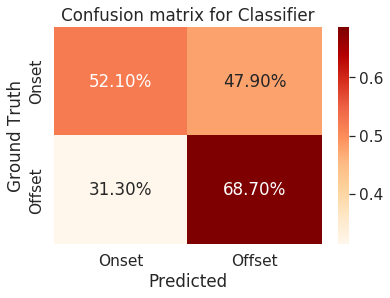

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

array = [[0.521, 0.479],
         [0.313, 0.687]]

#categories = ['Onset', 'Offset']
sns.set(font_scale=1.4) # for label size
#p = sns.heatmap(array, annot=True, annot_kws={"size": 16},fmt='.2%',cmap="OrRd") # font size
p = sns.heatmap(array,xticklabels=['Onset', 'Offset'], yticklabels=['Onset', 'Offset'], annot=True, fmt='.2%', cmap="OrRd")
p.set_title('Confusion matrix for Classifier');
p.set_xlabel('Predicted')
p.set_ylabel('Ground Truth');

plt.savefig('../image/confusion_matrix_cls_timeshift.png')
plt.show()

In [43]:
(52.1+70.10)/(52.1+47.9+29.9+70.10)

0.611

In [46]:
52.1/(52.1+29.9)

0.6353658536585366

In [ ]:
print('Metrical Evaluation of Test Set')
print('-'*30)
print(' Accuracy:  0.611')
print('Precision:  0.71')
print('   Recall:  0.521')
print('       F1:  0.601')
print('    Macro:  0.611')